In [ ]:
import zipfile

zip_path = "asl-alphabet.zip"
extract_path = "data/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from skimage.io import imread
from skimage.transform import resize
import pandas as pd
import os
import cv2
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


# Set the image size
IMG_SIZE = 64

# Set the path of the dataset
dataset_path = "data/asl_alphabet_train/asl_alphabet_train"


In [2]:
labels_dict = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'H':7, 'I':8, 'J':9, 'K':10, 'L':11, 'M':12, 'N':13, 'O':14, 'P':15, 'Q':16, 'R':17, 'S':18, 'T':19, 'U':20, 'V':21, 'W':22, 'X':23, 'Y':24, 'Z':25}


def load_data(dataset_path, img_size):
    data = []
    labels = []
    
    # Load the data
    for i, letter in enumerate(sorted(os.listdir(dataset_path))):
        if letter in labels_dict:
          print(letter)
          for file in os.listdir(dataset_path + "/" + letter):
              # Read the image
              img = imread(dataset_path + "/" + letter + "/" + file)

              # Resize the image
              img = resize(img, (img_size, img_size))

              # Flatten the image
              img = img.flatten()

              # Add the image and its corresponding label to the data
              data.append(img)
              labels.append(i)

    return np.array(data), np.array(labels)

In [3]:
data, labels = load_data(dataset_path, IMG_SIZE)

A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
Z


In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)


# 3 trees

In [5]:
# Define the model
model = RandomForestClassifier(n_estimators=3, random_state=42)

In [6]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=3, random_state=42)

In [7]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

Accuracy: 90.91025641025641%
[[813  43  15   9   5   0   0   0   0   0   0   1   3   0   7   0   0   0
    1   0   1   0   0   0   0   0]
 [ 80 729  17  16  13   4   0   0   0   0   0   1   0   0   4   0   0   0
    0   0   1   0   0   0   0   0]
 [ 42  36 813  31   1   1   0   0   0   0   0   1   1   0   3   0   0   0
    0   0   0   0   0   0   0   0]
 [ 27  59  43 722  13   8   0   0   0   0   0   0   0   0   0   0   1   0
    0   0   0   0   0   0   0   0]
 [ 24  49   7  27 775   7   0   0   0   0   0   0   0   0   0   1   0   0
    0   0   0   1   0   0   1   0]
 [ 14  48   2  18  32 764   2   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   3   0]
 [  1   1   0   1   3   5 850  15   5   6   0   0   0   0   0   0   0   1
    0   0   0   0   0   0   0   0]
 [  0   0   1   2   0   1  19 842   4   7   2   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   1   2   0   0   0  25   7 832   3   8   1   0   0   0   0   0   1
    0   0   0   0   0   0

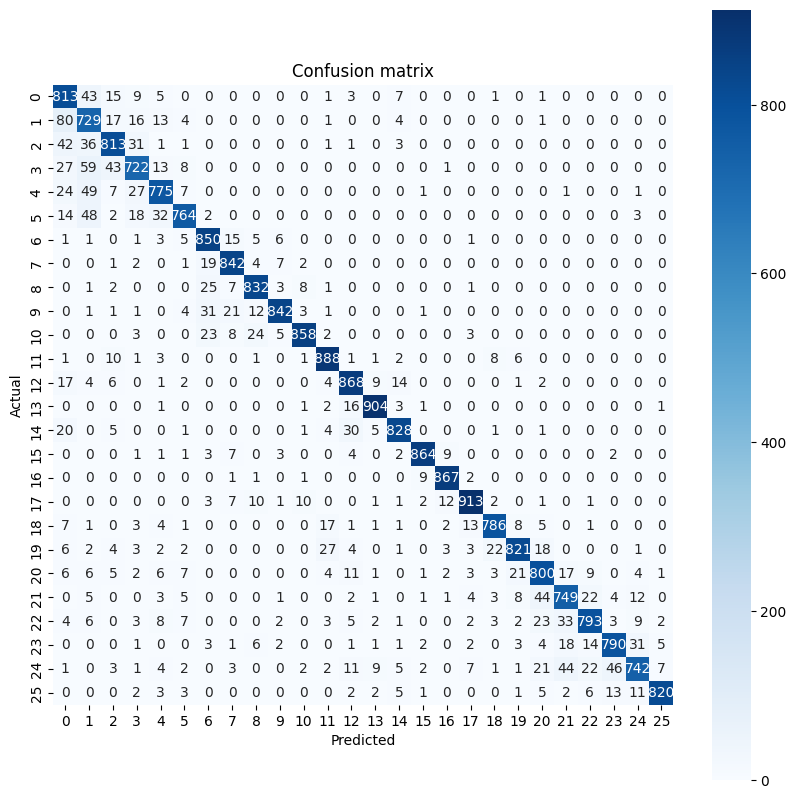

In [8]:
# Print the accuracy
print(f"Accuracy: {accuracy * 100}%")


# Print the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

plt.figure(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt=".0f", square=True, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.show()

In [9]:
# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1 Score:', f1_score(y_test, y_pred, average='weighted'))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.9091025641025641
Precision: 0.911559058259938
Recall: 0.9091025641025641
F1 Score: 0.9095320334649274

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.91      0.83       898
           1       0.74      0.84      0.79       865
           2       0.87      0.88      0.87       929
           3       0.85      0.83      0.84       873
           4       0.88      0.87      0.88       892
           5       0.93      0.87      0.89       883
           6       0.89      0.96      0.92       888
           7       0.92      0.96      0.94       878
           8       0.93      0.95      0.94       880
           9       0.97      0.92      0.94       918
          10       0.97      0.93      0.95       926
          11       0.93      0.96      0.94       923
          12       0.90      0.94      0.92       928
          13       0.96      0.97      0.97       929
          14       0.94      0.92      0.93       

# 10 iterations

In [10]:
# Define the model
model = RandomForestClassifier(n_estimators=10, random_state=42)

In [11]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [12]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

Accuracy: 97.00854700854701%
[[861   9  18   5   2   0   0   0   0   0   0   0   0   0   3   0   0   0
    0   0   0   0   0   0   0   0]
 [ 29 790   3   8  23   7   0   0   0   0   0   1   1   0   3   0   0   0
    0   0   0   0   0   0   0   0]
 [  9  10 891  13   1   1   0   0   0   0   0   3   1   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  3  26  13 824   6   1   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  3  28   0  24 823  13   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   1   0   0   0]
 [  0  25   0   6  20 830   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   2   0   0   0   0]
 [  0   0   0   0   0   0 873   6   1   7   1   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   7 865   1   2   3   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   4   0 870   1   5   0   0   0   0   0   0   0
    0   0   0   0   0   0

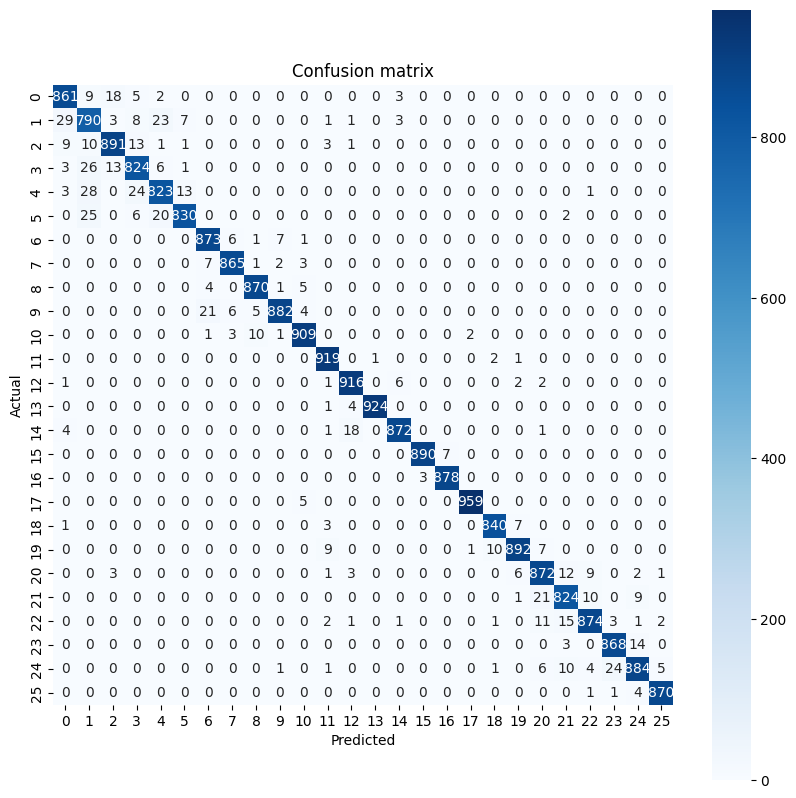

In [13]:
# Print the accuracy
print(f"Accuracy: {accuracy * 100}%")

# Print the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

plt.figure(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt=".0f", square=True, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.show()

In [14]:
# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1 Score:', f1_score(y_test, y_pred, average='weighted'))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.9700854700854701
Precision: 0.9702112414830204
Recall: 0.9700854700854701
F1 Score: 0.9700942505780453

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       898
           1       0.89      0.91      0.90       865
           2       0.96      0.96      0.96       929
           3       0.94      0.94      0.94       873
           4       0.94      0.92      0.93       892
           5       0.97      0.94      0.96       883
           6       0.96      0.98      0.97       888
           7       0.98      0.99      0.98       878
           8       0.98      0.99      0.98       880
           9       0.99      0.96      0.97       918
          10       0.98      0.98      0.98       926
          11       0.98      1.00      0.99       923
          12       0.97      0.99      0.98       928
          13       1.00      0.99      1.00       929
          14       0.99      0.97      0.98      

# 100 iterations

In [5]:
# Define the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [6]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

Accuracy: 98.93589743589743%
[[877   3  14   3   0   0   0   0   0   0   0   0   1   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  2 830   2   7  18   1   0   0   0   0   0   1   2   0   2   0   0   0
    0   0   0   0   0   0   0   0]
 [  2   0 926   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   3   1 869   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0  24   0  12 852   4   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   1   0   0   6 876   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 880   7   0   0   1   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  13 862   0   0   3   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 880   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0

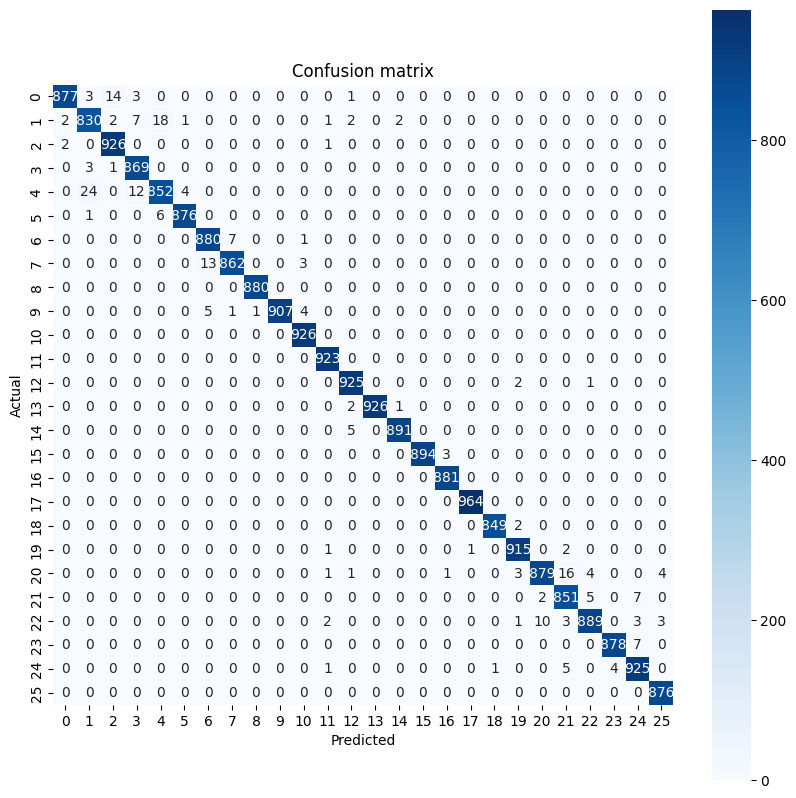

In [9]:
# Print the accuracy
print(f"Accuracy: {accuracy * 100}%")

# Print the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

plt.figure(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt=".0f", square=True, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.show()

In [10]:
# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1 Score:', f1_score(y_test, y_pred, average='weighted'))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.9893589743589744
Precision: 0.9893822684553306
Recall: 0.9893589743589744
F1 Score: 0.9893435526211527

Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.98      0.99       898
           2       0.96      0.96      0.96       865
           3       0.98      1.00      0.99       929
           4       0.98      1.00      0.99       873
           5       0.97      0.96      0.96       892
           6       0.99      0.99      0.99       883
           7       0.98      0.99      0.99       888
           8       0.99      0.98      0.99       878
           9       1.00      1.00      1.00       880
          10       1.00      0.99      0.99       918
          11       0.99      1.00      1.00       926
          12       0.99      1.00      1.00       923
          13       0.99      1.00      0.99       928
          14       1.00      1.00      1.00       929
          15       1.00      0.99      1.00      

In [11]:
from keras.preprocessing import image

# Load and preprocess the image
def prepare_image(file):
    img_path = ''
    img = image.load_img(img_path + file, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return img_array_expanded_dims / 255.0



In [30]:
from tabulate import tabulate

def process_and_predict_image(image_path, classifier, actual_class):
    # Load the image
    img = prepare_image(image_path)
    # Reshape the image to flatten it
    img = img.reshape(img.shape[0], -1)
    # Predict the class of the image using the trained classifier
    img_pred = classifier.predict(img)
    # Convert the numeric prediction to a character
    img_pred = chr(img_pred[0] + 64)
    # Return the predicted class and actual class
    return img_pred, actual_class

# Define list of images with their actual classes
images = [
    ('./OurAlphabet/A.jpg', 'A'),
    ('./OurAlphabet/K.jpg', 'K'),
    ('./OurAlphabet/U.jpg', 'U'),
    ('./OurAlphabet/W.jpg', 'W'),
    ('./OurAlphabet/Z.jpg', 'Z')
]

results = []
for image_path, actual_class in images:
    img_pred, actual_class = process_and_predict_image(image_path, model, actual_class)
    results.append([actual_class, img_pred])

# Sort the results based on the actual class
results = sorted(results, key=lambda x: x[0])

print(tabulate(results, headers=["Actual Class", "Predicted Class"], tablefmt='pretty'))

print("\nWorst quality test pictures:")

test_images_directory = "data/asl_alphabet_test/asl_alphabet_test/"
test_results = []
for file in os.listdir(test_images_directory):
    if file in [".DS_Store", "nothing_test.jpg" , "space_test.jpg" ]:
        continue
    image_path = os.path.join(test_images_directory, file)
    actual_class = file[0]
    img_pred, actual_class = process_and_predict_image(image_path, model, actual_class)
    test_results.append([actual_class, img_pred])

# Sort the test results based on the actual class
test_results = sorted(test_results, key=lambda x: x[0])

print(tabulate(test_results, headers=["Actual Class", "Predicted Class"], tablefmt='pretty'))


+--------------+-----------------+
| Actual Class | Predicted Class |
+--------------+-----------------+
|      A       |        P        |
|      K       |        O        |
|      U       |        P        |
|      W       |        P        |
|      Z       |        P        |
+--------------+-----------------+

Worst quality test pictures:
+--------------+-----------------+
| Actual Class | Predicted Class |
+--------------+-----------------+
|      A       |        A        |
|      B       |        B        |
|      C       |        C        |
|      D       |        D        |
|      E       |        E        |
|      F       |        F        |
|      G       |        G        |
|      H       |        H        |
|      I       |        I        |
|      J       |        J        |
|      K       |        K        |
|      L       |        L        |
|      M       |        M        |
|      N       |        N        |
|      O       |        O        |
|      P       |        P

# 26 iterations

In [20]:
# Define the model
model = RandomForestClassifier(n_estimators=26, random_state=42)

In [21]:
# Train the model
model.fit(X_train, y_train)

KeyboardInterrupt: 

In [9]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

Accuracy: 98.30341880341881%


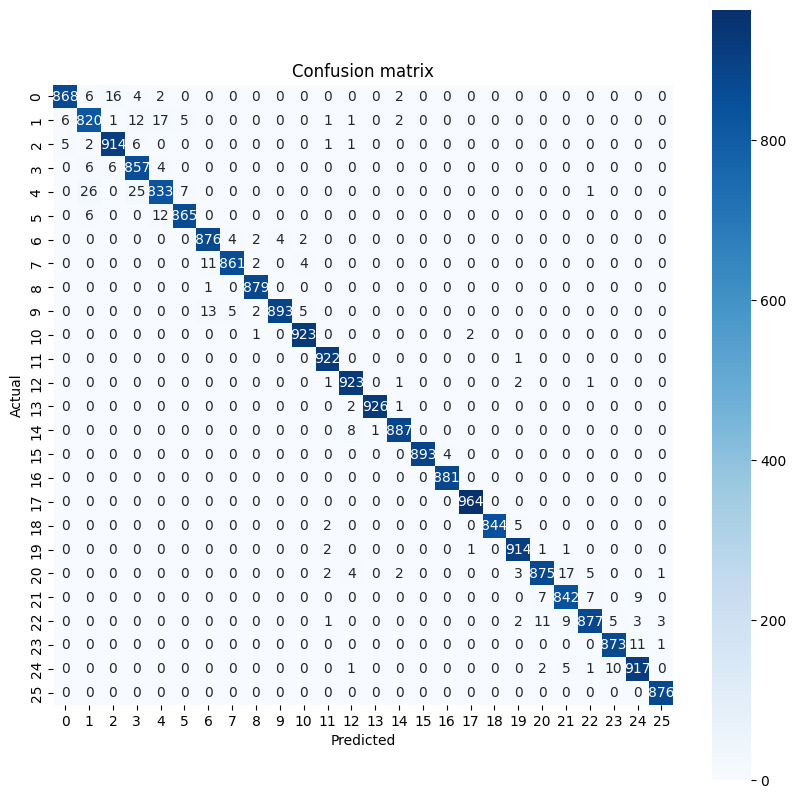

In [10]:
# Print the accuracy
print(f"Accuracy: {accuracy * 100}%")

# Print the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

plt.figure(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt=".0f", square=True, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.show()

In [11]:
# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1 Score:', f1_score(y_test, y_pred, average='weighted'))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.9830341880341881
Precision: 0.9830864893709711
Recall: 0.9830341880341881
F1 Score: 0.9830160297721958

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       898
           1       0.95      0.95      0.95       865
           2       0.98      0.98      0.98       929
           3       0.95      0.98      0.96       873
           4       0.96      0.93      0.95       892
           5       0.99      0.98      0.98       883
           6       0.97      0.99      0.98       888
           7       0.99      0.98      0.99       878
           8       0.99      1.00      1.00       880
           9       1.00      0.97      0.98       918
          10       0.99      1.00      0.99       926
          11       0.99      1.00      0.99       923
          12       0.98      0.99      0.99       928
          13       1.00      1.00      1.00       929
          14       0.99      0.99      0.99      